# Peak over threshold method

This notebook details the peak-over-threshold method which is commonly used in analyzing sea level extremes. The goal of the peak-over-threshold method is to typically determine return levels (such as an extreme sea level which would occur only once a year or once every hundred years.

Contents:
* [Generate data](#Generate-data)
* [Select subset of extreme values]
* [Fit extreme value distribution to extreme values]
* [Determine return levels using CDF of fitted values]

In [114]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

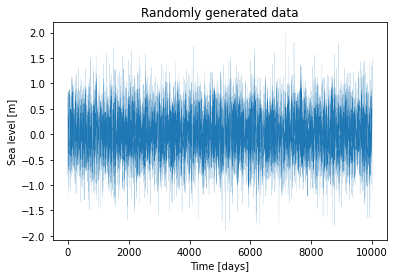

In [115]:
N = 10000
time = np.arange(N)
sea_level = rng.normal(scale=0.5, size=N)

fig, ax = plt.subplots()
ax.plot(time, sea_level, lw=0.1)
ax.set(
    title = 'Randomly generated data',
    xlabel='Time [days]',
    ylabel='Sea level [m]'
);

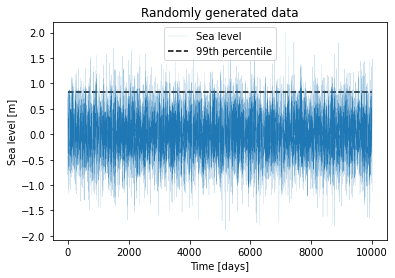

In [116]:
# Select subset of extreme values (those in the 95th percentile)
percentile = np.percentile(sea_level, 95)
extremes = sea_level[sea_level > percentile]

fig, ax = plt.subplots()
ax.plot(time, sea_level, lw=0.1, label='Sea level')
ax.hlines(percentile, 0, N, ls='--', color='k', label='99th percentile')
ax.set(
    title = 'Randomly generated data',
    xlabel='Time [days]',
    ylabel='Sea level [m]'
);
ax.legend();

In [117]:
# Fit generalized pareto distribution to extreme values
from scipy.stats import genpareto
fitted_params = genpareto.fit(extremes)
shape, loc, scale = fitted_params

/Users/andrewbrettin/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2282: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/Users/andrewbrettin/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/Users/andrewbrettin/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


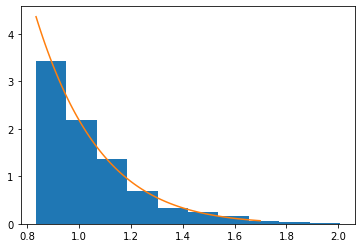

In [121]:
fig, ax = plt.subplots()
quantiles = np.linspace(
    genpareto.ppf(0.01, *fitted_params),
    genpareto.ppf(0.99, *fitted_params),
    99
)
fitted_pdf = genpareto.pdf(quantiles, *fitted_params)
ax.hist(extremes, bins=10, density=True)
ax.plot(quantiles, fitted_pdf)

In [119]:
genpareto.pdf?

Signature: genpareto.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      ~/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method
